# 3. FEATURE ENGINEERING AND MODEL TRAINING
---

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

cars = pd.read_csv('data/imports-85.cars2')
print(cars.shape)
cars.head()

(204, 26)


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,138.000,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,4,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
1,1,138.500,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,6,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
2,2,164.000,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,4,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
3,2,164.000,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,5,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
4,2,143.545,audi,gas,std,2,sedan,fwd,front,99.8,177.3,66.3,53.1,2507.0,ohc,5,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0


## 1. Encoding Categorical Attributes

We will use pandas' `get_dummies` since it makes column names for us. 

In [2]:
cat_cols = ['symboling', 'make', 'fuel_type', 'aspiration', 'body_style', 
            'drive_wheels', 'engine_location', 'engine_type', 'fuel_system']
cars_cat = cars[cat_cols]
cars_cat.head()

,symboling,make,fuel_type,aspiration,body_style,drive_wheels,engine_location,engine_type,fuel_system
0,3,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,1,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
2,2,audi,gas,std,sedan,fwd,front,ohc,mpfi
3,2,audi,gas,std,sedan,4wd,front,ohc,mpfi
4,2,audi,gas,std,sedan,fwd,front,ohc,mpfi


In [3]:
def make_dummies(df, column):
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop([column], axis=1)
    return df
for column in cat_cols:
    cars = make_dummies(cars, column)
    
print(cars.shape)
cars.head()

(204, 74)


,normalized_losses,num_doors,wheel_base,length,width,height,curb_weight,num_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel_type_diesel,fuel_type_gas,aspiration_std,aspiration_turbo,body_style_convertible,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd,engine_location_front,engine_location_rear,engine_type_dohc,engine_type_dohcv,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,138.000,2,88.6,168.8,64.1,48.8,2548.0,4,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,138.500,2,94.5,171.2,65.5,52.4,2823.0,6,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,164.000,4,99.8,176.6,66.2,54.3,2337.0,4,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,164.000,4,99.4,176.6,66.4,54.3,2824.0,5,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,143.545,2,99.8,177.3,66.3,53.1,2507.0,5,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


## 2. Scaling Numerical Attributes
Here we will use `MinMaxScaler` to scale each feature to a range between 0 and 1, which will fit in nicely with our one-hot-encoded categorical features whose values are either 0 or 1.

In [4]:
num_cols = ['normalized_losses','num_doors', 'wheel_base', 'length', 'width', 
            'height', 'curb_weight', 'num_cylinders', 'engine_size', 'bore', 
            'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 
            'highway_mpg']
cars_num = cars[num_cols]
cars_num.head()

,normalized_losses,num_doors,wheel_base,length,width,height,curb_weight,num_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,138.000,2,88.6,168.8,64.1,48.8,2548.0,4,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
1,138.500,2,94.5,171.2,65.5,52.4,2823.0,6,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0
2,164.000,4,99.8,176.6,66.2,54.3,2337.0,4,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0
3,164.000,4,99.4,176.6,66.4,54.3,2824.0,5,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0
4,143.545,2,99.8,177.3,66.3,53.1,2507.0,5,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cars_scaled = scaler.fit_transform(cars_num)
cars_scaled = pd.DataFrame(cars_scaled, columns=num_cols)
cars_scaled.head()

,normalized_losses,num_doors,wheel_base,length,width,height,curb_weight,num_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,0.382,0.0,0.058,0.413,0.317,0.083,0.411,0.2,0.260,0.664,0.290,0.125,0.262,0.347,0.222,0.289
1,0.385,0.0,0.230,0.449,0.433,0.383,0.518,0.4,0.343,0.100,0.667,0.125,0.442,0.347,0.167,0.263
2,0.518,1.0,0.385,0.530,0.492,0.542,0.329,0.2,0.181,0.464,0.633,0.188,0.225,0.551,0.306,0.368
3,0.518,1.0,0.373,0.530,0.508,0.542,0.518,0.3,0.283,0.464,0.633,0.062,0.279,0.551,0.139,0.158
4,0.411,0.0,0.385,0.540,0.500,0.442,0.395,0.3,0.283,0.464,0.633,0.094,0.258,0.551,0.167,0.237


In [6]:
cars_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
normalized_losses,204.0,0.298,0.172,0.0,0.152,0.273,0.411,1.0
num_doors,204.0,0.569,0.496,0.0,0.000,1.000,1.000,1.0
wheel_base,204.0,0.356,0.175,0.0,0.230,0.303,0.461,1.0
length,204.0,0.492,0.185,0.0,0.376,0.479,0.628,1.0
width,204.0,0.468,0.179,0.0,0.315,0.433,0.550,1.0
height,204.0,0.496,0.202,0.0,0.350,0.525,0.642,1.0
curb_weight,204.0,0.414,0.202,0.0,0.255,0.359,0.563,1.0
num_cylinders,204.0,0.238,0.108,0.0,0.200,0.200,0.200,1.0
engine_size,204.0,0.249,0.158,0.0,0.136,0.221,0.306,1.0
bore,204.0,0.563,0.194,0.0,0.436,0.550,0.745,1.0


## 3. Visualizing Scaled Numerical Stats
Let's see if we can visualize the data that we got from the `describe` method above to better understand how close our numerical feature values are:

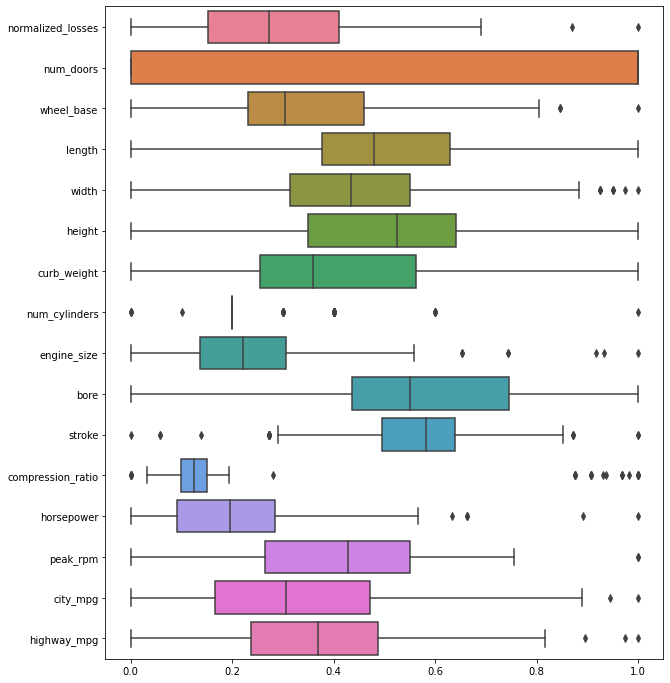

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,12))
ax = sns.boxplot(data=cars_scaled, orient="h", palette="husl")

The boxplot above allows us to visualize how our numerical values look, and gain some interesting insights like:
- as expected, because `num_doors` is binary, the predominant category (4 doors in this case) dictates what the boxplot will look like
- `num_cylinders` doesn't have a sizeable box, and seems to be made of outliers mostly
- `compression_ratio` has a large number of outliers near the maximum. The same can be said about `engine_size` but to a lesser degree
- however, all in all, the distribution of our numerical values look good

Let's now assign the scaled numerical features back to our `cars` dataframe and save the new dataset before we start training models.

In [8]:
cars[num_cols] = cars_scaled
cars.to_csv('data/imports-85.cars3', index=False)
print(cars.shape)
cars.head()

(204, 74)


,normalized_losses,num_doors,wheel_base,length,width,height,curb_weight,num_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel_type_diesel,fuel_type_gas,aspiration_std,aspiration_turbo,body_style_convertible,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd,engine_location_front,engine_location_rear,engine_type_dohc,engine_type_dohcv,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,0.382,0.0,0.058,0.413,0.317,0.083,0.411,0.2,0.260,0.664,0.290,0.125,0.262,0.347,0.222,0.289,16500.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.385,0.0,0.230,0.449,0.433,0.383,0.518,0.4,0.343,0.100,0.667,0.125,0.442,0.347,0.167,0.263,16500.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0.518,1.0,0.385,0.530,0.492,0.542,0.329,0.2,0.181,0.464,0.633,0.188,0.225,0.551,0.306,0.368,13950.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0.518,1.0,0.373,0.530,0.508,0.542,0.518,0.3,0.283,0.464,0.633,0.062,0.279,0.551,0.139,0.158,17450.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.411,0.0,0.385,0.540,0.500,0.442,0.395,0.3,0.283,0.464,0.633,0.094,0.258,0.551,0.167,0.237,15250.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


## 4. Beginning Model Training
Before we start training models, it is important to understand that due to the fact that our data size is very small, we will be using cross-validation on 100% of our data and their won't be any holding out a test set. 

In [9]:
np.random.seed(42)
cars_ = cars.loc[np.random.permutation(len(cars))]
X_cars = cars_.drop(['price'], axis=1)
y_cars = cars_['price'].copy()
X_cars.shape, y_cars.shape

((204, 73), (204,))

**The following are the models we will use**:
- Linear Regression 
- Support Vector Machines
- K_Nearest Neighbor
- Decision Tree Regression
- Random Forest Regression

**Performance measurement**:
- *Root mean-squared-error (primary)*: used to understand how much error a model makes in its predictions; large errors are given higher weight. 
- *Mean absolute error (secondary)*: might also be used since there are many outliers in the data. 

We will used both and see what we get.

## 5. Training a Linear Regression Model
- Linear regression is one of the simplest supervised regression algorithms in our toolkit
- LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.
- Let's run an **Ordinary least squares Linear Regression** with cross-validation and see what we get

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

ols = LinearRegression()
ols_mse = cross_val_score(ols, X_cars, y_cars, cv=5, n_jobs=-1, 
                             scoring="neg_mean_squared_error") 
ols_rmse = np.sqrt(np.absolute(ols_mse))
print('RMSE:', ols_rmse)
print('Avg_RMSE:', ols_rmse.mean())
print('Std_RMSE:', ols_rmse.std())

RMSE: [2.12822119e+15 2.73704131e+03 5.60697358e+14 1.21512371e+15
 1.13193068e+14]
Avg_RMSE: 803447065278198.9
Std_RMSE: 788087473776002.8


Now, this is just HORRIBLE! Never seen errors this large. One of them is good though, but it seems like it's an outlier. Let's use $R^2$ scoring and see what we get

In [11]:
ols_r2 = cross_val_score(ols, X_cars, y_cars, cv=kf, 
                         n_jobs=-1, scoring="r2") 
print('R2_values:', ols_r2)
print('Avg_R2:', ols_r2.mean())
print('Std_R2:', ols_r2.std())

NameError: name 'kf' is not defined

## 6. Training a Regularized Linear Model
- The results we got from our linear model above are so bad and discouraging possibly due to the fact that we have too many features for a very small dataset.
- We can vastly improve our model by constraining its weights through regularization. 
- In standard linear regression above, the model trains to minimize the sum of squared error. 
- Regularized regression learners attempt to minimize RSS (residual sum of squares) by applying some penalty for the total size of the coefficient values, called a shrinkage penalty. 
- There are 3 different ways to achieve this:
    - `Ridge Regression:` the shrinkage penalty (`alpha`) is a tuning hyperparameter multiplied by the squared sum of all coefficients 
    - `Lasso Regression:` the shrinkage penalty is a tuning hyperparameter multiplied by the sum of the absolute value of all coefficients
    - The hyperparameter, `$alpha$`, lets us control how much we penalize the coefficients, with higher values of α creating simpler models
    - `Elastic Net:` is a middle ground between Ridge Regression and Lasso Regression
- Ridge is a good default, but if we suspect that only a few features are useful, we should prefer Lasso or Elastic Net because they tend to reduce the useless features’ weights down to zero
-  In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.
- It sounds like `ELASTIC NET` would be a great fit for our case considering the size of our data and the number of features.